In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [23]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

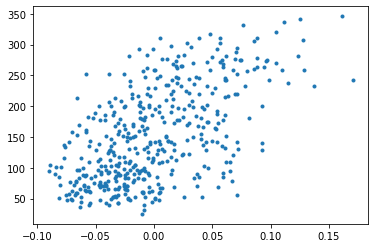

In [24]:
x1 = diabetes.data[:,2] #혈압
x2 = diabetes.target #당뇨진행정도
plt.plot(x1,x2,'.')

In [25]:
cen = [[-0.05,0.0,0.05,0.1],[50,120,150,250]]
c1 = [-0.05,50]; c2 = [0.0,120]; c3 = [0.05,150]; c4 = [0.1,250]

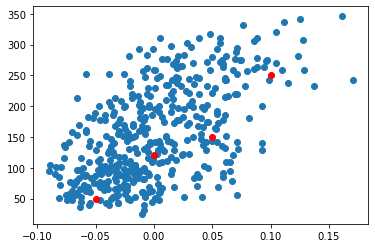

In [26]:
plt.scatter(x1,x2)
plt.plot(cen[0],cen[1],'ro')

In [27]:
r1 = (x1-c1[0])**2 + (x2-c1[1])**2
r2 = (x1-c2[0])**2 + (x2-c2[1])**2
r3 = (x1-c3[0])**2 + (x2-c3[1])**2
r4 = (x1-c4[0])**2 + (x2-c4[1])**2
g = np.array([])
for i in range(len(r1)):
    g = np.append(g,np.argmin([r1[i],r2[i],r3[i],r4[i]]))

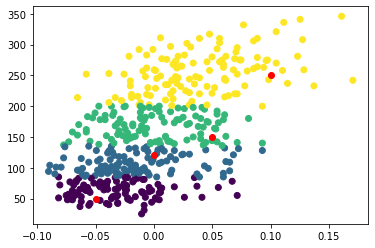

In [28]:
plt.scatter(x1,x2,c=g)
plt.plot(cen[0],cen[1],'ro')

In [29]:
a = []
for j in range(4):
    a.append([np.mean([x1[i] for i in np.where(g==j)]),np.mean([x2[i] for i in np.where(g==j)])])

In [30]:
a

[[-0.030548238144024083, 62.41509433962264],
 [-0.015652061839915406, 107.4245283018868],
 [0.0007599053787183098, 167.24074074074073],
 [0.03946854112619388, 255.55737704918033]]

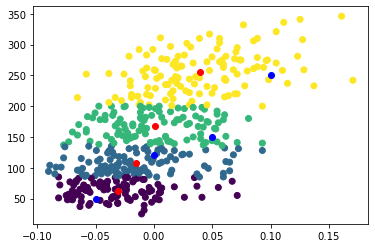

In [31]:
plt.scatter(x1,x2,c=g)
plt.plot(cen[0],cen[1],'bo')
plt.plot([i[0] for i in a],[i[1] for i in a],'ro')

[[-0.030061528037705537, 62.2], [-0.015612314053314303, 108.01818181818182], [0.0016453493334103772, 171.55172413793105], [0.04218877898331259, 260.6306306306306]]
[[-0.02878067858232291, 63.03669724770642], [-0.016033640591285928, 109.96363636363637], [0.0013844003844886007, 174.83898305084745], [0.04511843033471086, 263.2857142857143]]
[[-0.029055570102083362, 63.24545454545454], [-0.01301991860288582, 112.55084745762711], [0.00027045646742300186, 179.04424778761063], [0.04655348045099548, 265.0792079207921]]
[[-0.029273057181277182, 63.669642857142854], [-0.011586251805425113, 114.7479674796748], [0.0024646590656800665, 183.46428571428572], [0.046606837484355915, 267.89473684210526]]
[[-0.029534191734891493, 64.92372881355932], [-0.010292658249273338, 116.875], [0.003028273632306495, 185.19819819819818], [0.04713994883272711, 268.81720430107526]]
[[-0.029111651380724322, 65.9430894308943], [-0.00886514621972753, 119.90163934426229], [0.002675631896075712, 187.53846153846155], [0.047

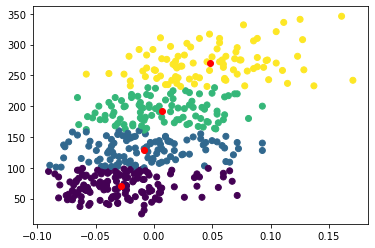

In [32]:
#중심점 4개의 위치가 바뀌지 않는 것을 확인하기 위해서 print(a)를 넣었습니다.
for p in range(20):
    c1 = a[0][0], a[0][1]
    c2 = a[1][0], a[1][1]
    c3 = a[2][0], a[2][1]
    c4 = a[3][0], a[3][1]
    r1 = (x1-c1[0])**2 + (x2-c1[1])**2
    r2 = (x1-c2[0])**2 + (x2-c2[1])**2
    r3 = (x1-c3[0])**2 + (x2-c3[1])**2
    r4 = (x1-c4[0])**2 + (x2-c4[1])**2
    g = np.array([])
    for i in range(len(r1)):
        g = np.append(g,np.argmin([r1[i],r2[i],r3[i],r4[i]]))

    a = []
    for j in range(4):
        a.append([np.mean([x1[i] for i in np.where(g==j)]),np.mean([x2[i] for i in np.where(g==j)])])
    print(a)

plt.scatter(x1,x2,c=g)
plt.plot([i[0] for i in a],[i[1] for i in a],'ro')

In [33]:
from sklearn.cluster import KMeans

In [34]:
km = KMeans(n_clusters = 4)
X = [x1,x2]
data = np.transpose(X)

In [35]:
km.fit(data)

KMeans(n_clusters=4)

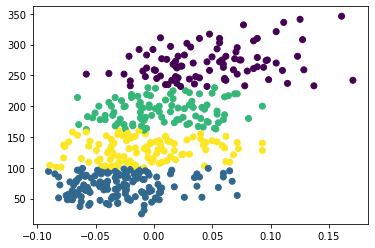

In [36]:
plt.scatter(x1,x2,c=km.labels_)

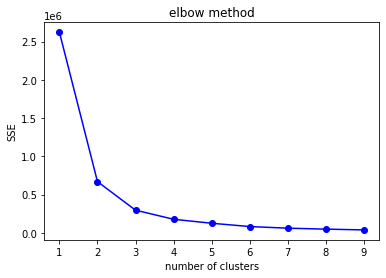

In [37]:
#엘보우기법
from sklearn.cluster import KMeans
X = [x1,x2]
XX = np.transpose(X)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(XX, 10)

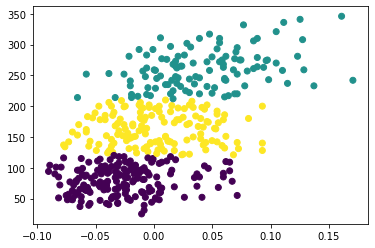

In [38]:
# 3이나 4가 적당해 보이고 4는 위에서 했으니 3으로 진행했습니다.
km = KMeans(n_clusters = 3)
km.fit(XX)
plt.scatter(x1,x2,c=km.labels_)